# Importing all the necessary Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

C:\Users\Shreevara\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Shreevara\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Shreevara\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Shreevara\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Futu

# Importing the images and their labels 

In [2]:
    train_data = []
    train_labels = []
    classes = 43
    cur_path = os.getcwd()

    #Retrieving the images and their labels 
    for i in range(43):
        path = os.path.join(cur_path,'train',str(i))
        images = os.listdir(path)

    #print(path)
    #print(images[:3])

        for a in images:
            try:
                image = Image.open(path + '\\'+ a)
                image = image.resize((32,32))
                image = np.array(image)
                train_data.append(image)
                train_labels.append(i)
            except:
                print("Error loading image")
    #print(image)
    #print(labels)

    #Converting lists into numpy arrays
    train_data = np.array(train_data)
    train_labels = np.array(train_labels)
    print(train_labels)
    print(train_data.shape, train_labels.shape)

[ 0  0  0 ... 42 42 42]
(39209, 32, 32, 3) (39209,)


# Train and valid split

In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


# Reading test data

In [4]:
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((32,32))
    data.append(np.array(image))

X_test=np.array(data)
print(X_test.shape)

(12630, 32, 32, 3)


In [5]:
# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 31367
Number of validation examples = 7842
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [6]:
# Load sign names file
sign_names = pd.read_csv("labels.csv")
sign_names.set_index("ClassId")

sign_names.head(5)

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [7]:
def group_img_id_to_lbl(lbs_ids, lbs_names):    
   
    #Utility function to group images by label 

    arr_map = []
    for i in range(0, lbs_ids.shape[0]):
        label_id = lbs_ids[i]
        label_name = lbs_names[lbs_names["ClassId"] == label_id]["Name"].values[0]
        arr_map.append({"img_id": i, "label_id": label_id, "label_name": label_name})
    
    return pd.DataFrame(arr_map)


X_train_id_to_label = group_img_id_to_lbl(y_train, sign_names)


In [8]:
def group_img_id_to_lb_count(img_id_to_lb):

    return pd.pivot_table(img_id_to_lb,index=["label_id","label_name"],values=["img_id"], aggfunc='count')

# We should group by label id to understand the distribution
X_train_group_by_label_count = group_img_id_to_lb_count(X_train_id_to_label)
X_train_group_by_label_count.head(n=5)

,,img_id
label_id,label_name,
0,Speed limit (20km/h),172
1,Speed limit (30km/h),1724
2,Speed limit (50km/h),1800
3,Speed limit (60km/h),1130
4,Speed limit (70km/h),1562


# count of the number of images for each class in train data

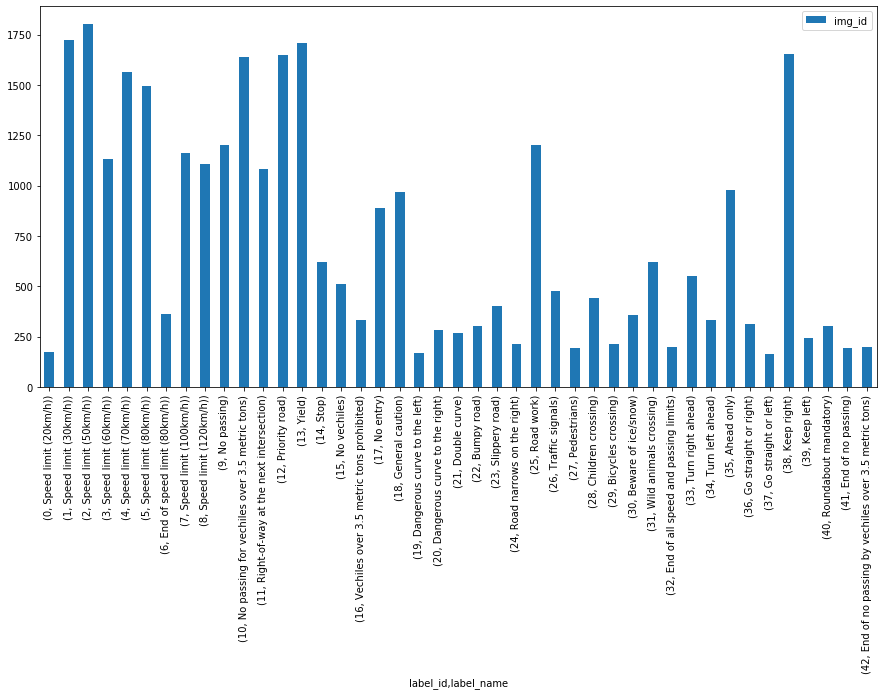

In [9]:
# Now count the number of images for each class and plot the results so that we understand the distribution
X_train_group_by_label_count.plot(kind='bar', figsize=(15, 7))

# # count of the number of images for each class in valid data

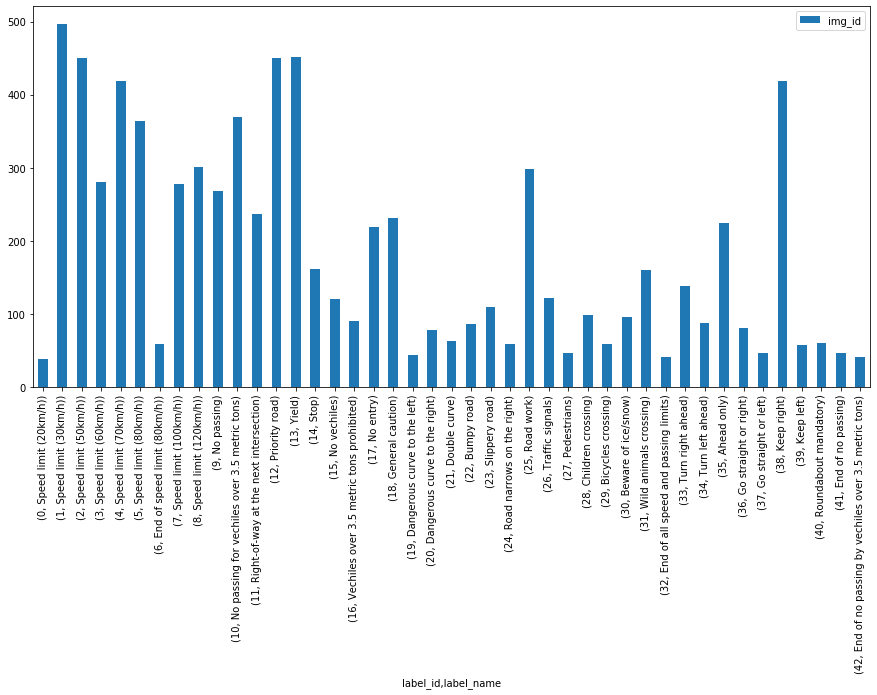

In [10]:
# Create a data frame whereby we index image id  with label
X_valid_id_to_label = group_img_id_to_lbl(y_valid, sign_names)

# We should group by label id to understand the distribution
X_valid_group_by_label_count = group_img_id_to_lb_count(X_valid_id_to_label)
X_valid_group_by_label_count.head(n=3)

# Now count the number of images for each class and plot the results so that we understand the distribution
X_valid_group_by_label_count.plot(kind='bar', figsize=(15, 7))

X_train_group_by_label = X_train_id_to_label.groupby(["label_id", "label_name"])
X_valid_group_by_label = X_valid_id_to_label.groupby(["label_id", "label_name"])

In [11]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_valid = to_categorical(y_valid, 43)

# Building the model for color images

In [12]:
#Building the model
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model1.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.25))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.25))

model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(rate=0.5))
model1.add(Dense(43, activation='softmax'))

#Compilation of the model
model1.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

epochs = 15
model_1 = model1.fit(X_train, 
                    y_train, 
                    batch_size=32, 
                    epochs=epochs, 
                    validation_data=(X_valid, y_valid))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 134s 4ms/step - loss: 1.4707 - acc: 0.6353 - val_loss: 0.2327 - val_acc: 0.9458
Epoch 2/15
31367/31367 [==============================] - 130s 4ms/step - loss: 0.3760 - acc: 0.8948 - val_loss: 0.1173 - val_acc: 0.9681
Epoch 3/15
31367/31367 [==============================] - 127s 4ms/step - loss: 0.2673 - acc: 0.9254 - val_loss: 0.0903 - val_acc: 0.9753
Epoch 4/15
31367/31367 [==============================] - 124s 4ms/step - loss: 0.2477 - acc: 0.9318 - val_loss: 0.0534 - val_acc: 0.9839
Epoch 5/15
31367/31367 [==============================] - 124s 4ms/step - loss: 0.2226 - acc: 0.9394 - val_loss: 0.0619 - val_acc: 0.9828
Epoch 6/15
31367/31367 [=====================

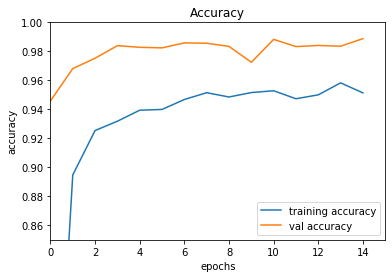

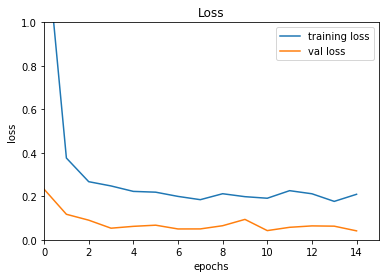

In [13]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(model_1.history['acc'], label='training accuracy')
plt.plot(model_1.history['val_acc'], label='val accuracy')
plt.xlim(0, 15)
plt.ylim(0.85, 1)
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(model_1.history['loss'], label='training loss')
plt.plot(model_1.history['val_loss'], label='val loss')
plt.xlim(0, 15)
plt.ylim(0, 1)
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Preprocessing train, valid and test data [Normalizing]


In [14]:
def normalise(imgs, dist):

    #Normalise the images from data in dist
  
    std = np.std(dist)
    mean = np.mean(dist)
    return (imgs - mean) / std

# Normalise training set
X_train_normalised = normalise(X_train, X_train)

In [15]:
# Normalising test and validation set
X_valid_normalised = normalise(X_valid, X_train) 
X_test_normalised = normalise(X_test, X_train)

# Building the model for normalized images

In [16]:
#Building the model
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train_normalised.shape[1:]))
model2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.25))

model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.25))

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(43, activation='softmax'))

#Compilation of the model
model2.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

epochs = 15

model_2 = model2.fit(X_train_normalised, 
                    y_train, 
                    batch_size=32, 
                    epochs=epochs, 
                    validation_data=(X_valid_normalised, y_valid))

#model2.save("my_model.h5")

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 137s 4ms/step - loss: 0.9842 - acc: 0.7231 - val_loss: 0.1253 - val_acc: 0.9634
Epoch 2/15
31367/31367 [==============================] - 128s 4ms/step - loss: 0.2198 - acc: 0.9331 - val_loss: 0.0617 - val_acc: 0.9824
Epoch 3/15
31367/31367 [==============================] - 126s 4ms/step - loss: 0.1607 - acc: 0.9522 - val_loss: 0.0436 - val_acc: 0.9875
Epoch 4/15
31367/31367 [==============================] - 134s 4ms/step - loss: 0.1247 - acc: 0.9632 - val_loss: 0.0376 - val_acc: 0.9903
Epoch 5/15
31367/31367 [==============================] - 139s 4ms/step - loss: 0.1162 - acc: 0.9660 - val_loss: 0.0415 - val_acc: 0.9901
Epoch 6/15
31367/31367 [==============================] - 123s 4ms/step - loss: 0.1039 - acc: 0.9705 - val_loss: 0.0357 - val_acc: 0.9907
Epoch 7/15
31367/31367 [==============================] - 115s 4ms/step - loss: 0.0970 - acc: 0.9725 - val_loss: 0.0384 - v

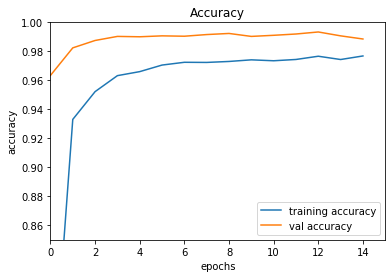

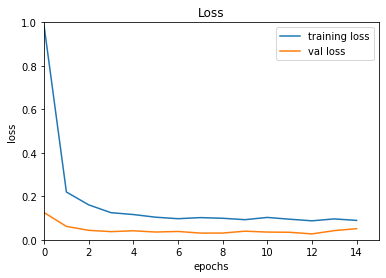

In [17]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(model_2.history['acc'], label='training accuracy')
plt.plot(model_2.history['val_acc'], label='val accuracy')
plt.xlim(0, 15)
plt.ylim(0.85, 1)
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(model_2.history['loss'], label='training loss')
plt.plot(model_2.history['val_loss'], label='val loss')
plt.xlim(0, 15)
plt.ylim(0, 1)
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Prediction for test data

Accuracy with test data from the model trained from color images

In [190]:
model1.save("sequential1.h5")

In [25]:
pred = model1.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.959144893111639


Accuracy with test data from the model trained from normalized images

In [26]:
pred = model2.predict_classes(X_test_normalised)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9657957244655582


In [62]:
sign_names = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)\
', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)\
', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons\
', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles\
', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left\
', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right\
', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing \
', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits\
', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right\
', 'Keep left', 'Roundabout mandatory', 'End of no passing','End of no passing by vehicles over 3.5 metric tons']

predicted sign is: [5] Speed limit (80km/h)
Actual classId : 5


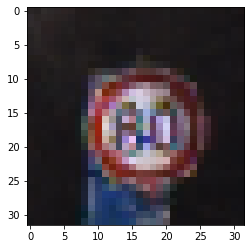

In [187]:
#prediction of 222th image from model1
plt.imshow(X_test[222])

prediction=str(model1.predict_classes(X_test[222].reshape(1,32,32,3)))


pred_value = prediction[1:2]
pred_statement = sign_names[int(pred_value)]

print("predicted sign is: " + prediction + " " + pred_statement)

#actual classId to which the image is belonged to:-
print("Actual classId :", labels[222])



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted sign is: [28] Children crossing 
Actual classId : 28


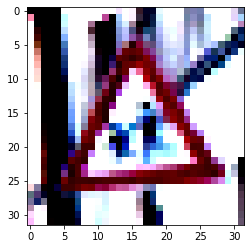

In [184]:
#prediction of 1245th image from model2[normalized]

plt.imshow(X_test_normalised[1245])

prediction=str(model1.predict_classes(X_test[1245].reshape(1,32,32,3)))


pred_value = prediction[1:3]
pred_statement = sign_names[int(pred_value)]

print("predicted sign is: " + prediction + " " + pred_statement)

#actual classId to which the image is belonged to:-
print("Actual classId :", labels[1245])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted sign is: [25] Road work
Actual classId : 25


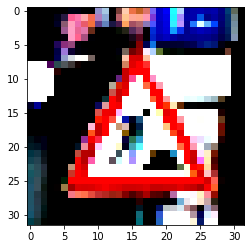

In [160]:
#prediction of 333th image from model2[normalized]

plt.imshow(X_test_normalised[333])

prediction=str(model1.predict_classes(X_test[333].reshape(1,32,32,3)))


pred_value = prediction[1:3]
pred_statement = sign_names[int(pred_value)]

print("predicted sign is: " + prediction + " " + pred_statement)

#actual classId to which the image is belonged to:-
print("Actual classId :", labels[333])


(1, 32, 32, 3)
predicted sign is:  Dangerous curve to the left


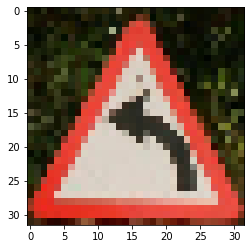

In [164]:
test_data=[]
image = Image.open("C:/Users/Shreevara/Desktop/capstone/datatsetssss/detect.jpeg")
image = image.resize((32,32))
image = np.array(image)
test_data.append(image)

test_data = np.array(test_data)
print(test_data.shape)
plt.imshow(test_data[0])


prediction = model1.predict_classes([test_data])[0]
#print(prediction)
pred_value = prediction
pred_statement = sign_names[int(pred_value)]

print("predicted sign is: ",pred_statement)


(1, 32, 32, 3)
predicted sign is:  Speed limit (80km/h)


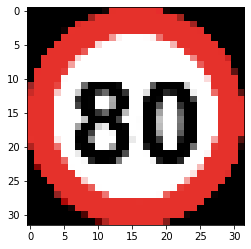

In [189]:
test_data=[]
image = Image.open("C:/Users/Shreevara/Desktop/capstone/datatsetssss/2.png")
image = image.resize((32,32))
image = np.array(image)
test_data.append(image)

test_data = np.array(test_data)
print(test_data.shape)
plt.imshow(test_data[0])


#prediction=str(model1.predict_classes(test_data[0].reshape(1,32,32,3)))

prediction = model1.predict_classes([test_data])[0]
#print(prediction)
pred_value = prediction
pred_statement = sign_names[int(pred_value)]

print("predicted sign is: ",pred_statement)